# CV-HW2-HUT
## November, 2025
### Teammates :
    - Arman Esmaeili - 401130133
    - Nima Rezaee - 401130373

# == 1.1 ==

In [167]:
import os
import random
import string
from PIL import ImageFont, ImageDraw, Image
import shutil

# Clear any existing directories
ORIGINAL_DIR = "Original Captcha"
NOISY_DIR = "Noisy Images"

for dir_path in [ORIGINAL_DIR, NOISY_DIR]:
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)

os.makedirs(ORIGINAL_DIR, exist_ok=True)

# Download Arial font
!wget -q -O arial.ttf "https://raw.githubusercontent.com/JotJunior/PHP-Boleto-ZF2/master/public/assets/fonts/arial.ttf"

# CAPTCHA parameters
WIDTH, HEIGHT = 200, 100
N_SAMPLES = 10  # EXACTLY 10
CHARS = string.ascii_lowercase + string.digits
FONT_SIZE = 40

# Load font
font = ImageFont.truetype("arial.ttf", FONT_SIZE)

def generate_captcha(text):
    """Generate clean CAPTCHA"""
    img = Image.new("RGB", (WIDTH, HEIGHT), (255, 255, 255))
    draw = ImageDraw.Draw(img)

    bbox = draw.textbbox((0, 0), text, font=font)
    text_w = bbox[2] - bbox[0]
    text_h = bbox[3] - bbox[1]
    x = (WIDTH - text_w) // 2
    y = (HEIGHT - text_h) // 2

    draw.text((x, y), text, font=font, fill=(0, 0, 0))
    return img

print("Generating EXACTLY 10 original CAPTCHAs...")
print("=" * 60)

# Generate exactly 10 unique CAPTCHAs
captcha_texts = []
for i in range(N_SAMPLES):
    # Generate unique 3-character text
    while True:
        text = ''.join(random.choices(CHARS, k=3))
        if text not in captcha_texts:
            captcha_texts.append(text)
            break

    img = generate_captcha(text)
    filename = f"captcha_{i:02d}.png"
    img.save(os.path.join(ORIGINAL_DIR, filename))
    print(f"Created: {filename} → Text: '{text}'")

print("\n" + "=" * 60)
print(f"Created {N_SAMPLES} original CAPTCHAs in '{ORIGINAL_DIR}'")

Generating EXACTLY 10 original CAPTCHAs...
Created: captcha_00.png → Text: 'www'
Created: captcha_01.png → Text: '85a'
Created: captcha_02.png → Text: '5g8'
Created: captcha_03.png → Text: 't9v'
Created: captcha_04.png → Text: '3w5'
Created: captcha_05.png → Text: 'pfb'
Created: captcha_06.png → Text: 'kio'
Created: captcha_07.png → Text: 'pke'
Created: captcha_08.png → Text: 'ujn'
Created: captcha_09.png → Text: 'npc'

Created 10 original CAPTCHAs in 'Original Captcha'


# == 1.2 ==

<div dir="rtl" style="text-align: justify; line-height: 1.8">

#  مقایسه تصویر اصلی و تصویر دارای نویز Salt & Pepper

## ۱. مقدمه
در این آزمایش، ده نسخه از یک تصویر مورد بررسی قرار گرفته است. تصویر اول، نسخه اصلی و بدون نویز می‌باشد، در حالی که تصویر دوم با نویز Salt & Pepper آلوده شده است. هدف این مقایسه، بررسی اثرات این نوع نویز بر کیفیت بصری تصویر و ساختار پیکسل‌ها می‌باشد؛ موضوعی که در مباحث پیش‌پردازش تصاویر در بینایی ماشین اهمیت بالایی دارد.

---

## ۲. تصویر اصلی (Original Image)
تصویر اصلی شامل پس‌زمینه‌ای یکنواخت و روشن بوده و حاوی کاراکترهای متنی واضح با لبه‌های صاف و پیوسته است. ویژگی‌های مهم این تصویر عبارتند از:

- یکنواختی شدت روشنایی در نواحی پس‌زمینه
- وضوح بالا در نواحی متن
- نبود نقاط تصادفی یا اغتشاش در ساختار پیکسل‌ها
- قابلیت بالا برای پردازش‌هایی نظیر تشخیص لبه، OCR و آستانه‌گذاری

این تصویر می‌تواند به عنوان مرجع (Ground Truth) در نظر گرفته شود.

---

## ۳. تصویر نویزی با Salt & Pepper
در تصویر دوم، نویز Salt & Pepper به‌صورت نقاط سفید و سیاه تصادفی در سراسر تصویر اضافه شده است. این نوع نویز معمولاً به دلیل خطاهای سنسور، انتقال داده یا کوانتیزه‌سازی ایجاد می‌شود.

ویژگی‌های مشاهده‌شده در این تصویر عبارتند از:

- حضور پیکسل‌های کاملاً سفید (Salt) و کاملاً سیاه (Pepper) به‌صورت پراکنده
- تخریب یکنواختی پس‌زمینه تصویر
- تداخل در لبه‌های متنی و کاهش خوانایی کاراکترها
- افزایش پیچیدگی برای الگوریتم‌های پردازش تصویر

---

## ۴. تحلیل مقایسه‌ای دو تصویر

| معیار مقایسه | تصویر اصلی | تصویر نویزی |
|--------------|-----------|-------------|
| میزان نویز | بدون نویز | دارای نویز شدید |
| یکنواختی پس‌زمینه | بالا | پایین |
| وضوح لبه‌ها | واضح و پیوسته | ناپیوسته و مخدوش |
| مناسب برای OCR | بله | خیر (بدون پیش‌پردازش) |
| پایداری پیکسلی | بالا | پایین |

نویز Salt & Pepper باعث تخریب اطلاعات پیکسلی شده و ساختار طبیعی تصویر را به‌طور قابل توجهی مختل می‌کند. این موضوع به‌ویژه در نواحی دارای جزئیات ظریف مانند لبه‌های متن، اثر منفی برجای می‌گذارد.

---

## ۵. تأثیر نویز بر پردازش‌های بینایی ماشین
وجود این نویز می‌تواند موجب:
- خطای تشخیص لبه (Edge Detection)
- کاهش دقت آستانه‌گذاری (Thresholding)
- افت شدید عملکرد سیستم‌های تشخیص متن (OCR)
- نیاز به استفاده از فیلترهای حذف نویز مانند Median Filter

شود.

---

## ۶. نتیجه‌گیری
مقایسه انجام‌شده نشان می‌دهد که نویز Salt & Pepper به‌طور مستقیم کیفیت تصویر را کاهش داده و انجام پردازش‌های بعدی را دشوار می‌سازد. بنابراین، استفاده از روش‌های مناسب حذف نویز به‌عنوان مرحله پیش‌پردازش در سیستم‌های بینایی ماشین ضروری است. این تحلیل اهمیت طراحی زنجیره پیش‌پردازش مناسب را در کاربردهای عملی Computer Vision برجسته می‌کند.

</div>


In [168]:
import os
import numpy as np
from PIL import Image

ORIGINAL_DIR = "Original Captcha"
NOISY_DIR = "Noisy Images"

# Create noisy directory
os.makedirs(NOISY_DIR, exist_ok=True)

# Get the EXACT 10 original files
original_files = sorted([f for f in os.listdir(ORIGINAL_DIR) if f.endswith('.png')])

print("Adding Salt & Pepper noise to THE SAME 10 images...")
print("=" * 60)

def add_salt_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    """Add Salt & Pepper noise"""
    img_array = np.array(image)
    noisy_array = img_array.copy()

    salt_mask = np.random.random(img_array.shape[:2]) < salt_prob
    pepper_mask = np.random.random(img_array.shape[:2]) < pepper_prob

    noisy_array[salt_mask] = [255, 255, 255]  # White
    noisy_array[pepper_mask] = [0, 0, 0]      # Black

    return Image.fromarray(noisy_array.astype('uint8'))

# Process THE SAME 10 images
for filename in original_files:
    original_path = os.path.join(ORIGINAL_DIR, filename)
    original_img = Image.open(original_path)

    # Add noise to THE SAME image
    noisy_img = add_salt_pepper_noise(original_img, salt_prob=0.02, pepper_prob=0.02)

    # Save with SAME filename in noisy directory
    noisy_path = os.path.join(NOISY_DIR, filename)
    noisy_img.save(noisy_path)

    print(f"Added noise to: {filename}")

print("\n" + "=" * 60)
print("SUCCESS: Created noisy versions of THE SAME 10 images")
print(f"Original: {ORIGINAL_DIR}/ → 10 clean images")
print(f"Noisy:    {NOISY_DIR}/ → Same 10 images with Salt & Pepper noise")
print("Each file has exact 1:1 correspondence (same filename)")

Adding Salt & Pepper noise to THE SAME 10 images...
Added noise to: captcha_00.png
Added noise to: captcha_01.png
Added noise to: captcha_02.png
Added noise to: captcha_03.png
Added noise to: captcha_04.png
Added noise to: captcha_05.png
Added noise to: captcha_06.png
Added noise to: captcha_07.png
Added noise to: captcha_08.png
Added noise to: captcha_09.png

SUCCESS: Created noisy versions of THE SAME 10 images
Original: Original Captcha/ → 10 clean images
Noisy:    Noisy Images/ → Same 10 images with Salt & Pepper noise
Each file has exact 1:1 correspondence (same filename)


📊 ALL 20 IMAGES IN GRID FORMAT
Top row: 10 Original Images | Bottom row: 10 Noisy Images (same images)
--------------------------------------------------------------------------------


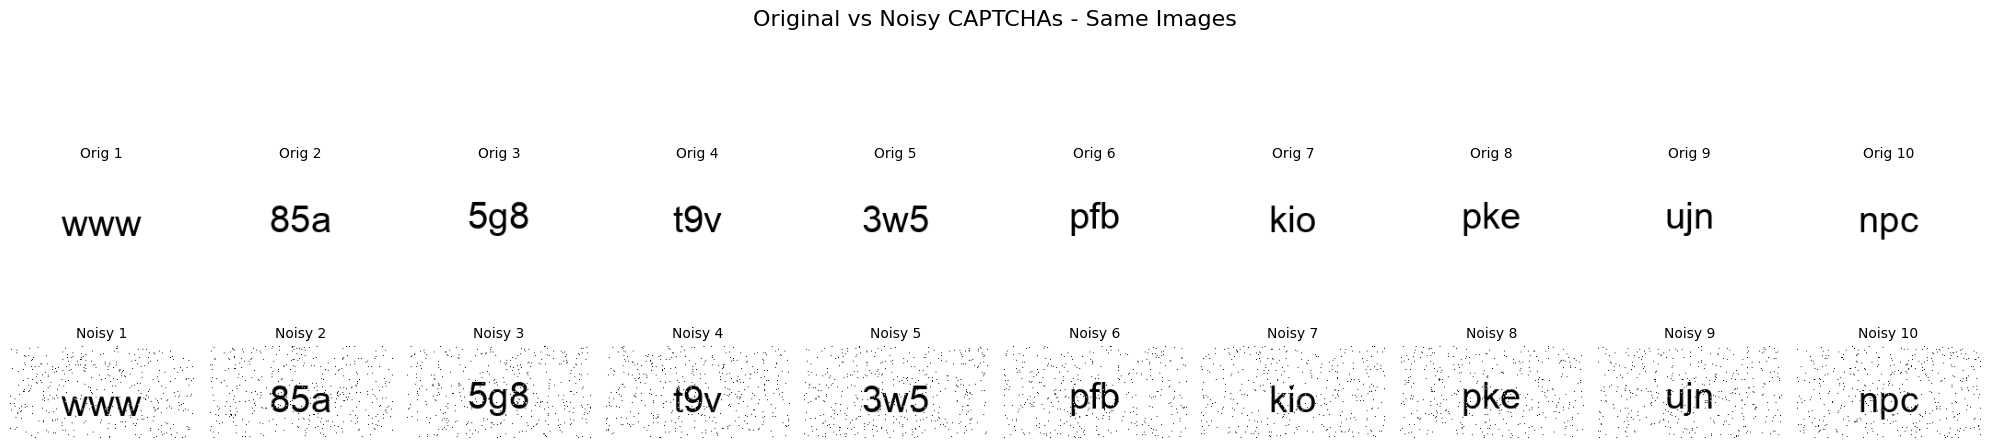


 Key to grid:
Row 1 (top): Original clean images
Row 2 (bottom): Same images with Salt & Pepper noise
Column alignment: Each column shows the same image (clean above, noisy below)


In [169]:
import os
import matplotlib.pyplot as plt
from PIL import Image

ORIGINAL_DIR = "Original Captcha"
NOISY_DIR = "Noisy Images"

print("📊 ALL 20 IMAGES IN GRID FORMAT")
print("=" * 80)
print("Top row: 10 Original Images | Bottom row: 10 Noisy Images (same images)")
print("-" * 80)

# Create 2x10 grid (2 rows, 10 columns)
fig, axes = plt.subplots(2, 10, figsize=(20, 5))

# Display original images (top row)
for i in range(10):
    filename = f"captcha_{i:02d}.png"
    original_path = os.path.join(ORIGINAL_DIR, filename)

    img = Image.open(original_path)
    axes[0, i].imshow(img)
    axes[0, i].set_title(f"Orig {i+1}", fontsize=10)
    axes[0, i].axis('off')

# Display noisy images (bottom row)
for i in range(10):
    filename = f"captcha_{i:02d}.png"
    noisy_path = os.path.join(NOISY_DIR, filename)

    img = Image.open(noisy_path)
    axes[1, i].imshow(img)
    axes[1, i].set_title(f"Noisy {i+1}", fontsize=10)
    axes[1, i].axis('off')

plt.suptitle('Original vs Noisy CAPTCHAs - Same Images', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

print("\n Key to grid:")
print("Row 1 (top): Original clean images")
print("Row 2 (bottom): Same images with Salt & Pepper noise")
print("Column alignment: Each column shows the same image (clean above, noisy below)")

# == 1.3 ==

<div dir="rtl" style="text-align: right; line-height: 1.9; font-size: 16px">

### انتخاب کرنل Gaussian با σ≈0.8 برای محو‌سازی CAPTCHA

در این پیاده‌سازی، از یک کرنل <span dir="ltr">Gaussian</span> با انحراف معیار تقریباً <span dir="ltr">σ ≈ 0.8</span> (مطابق با <span dir="ltr">radius = 1</span> در کتابخانه <span dir="ltr">PIL</span>) استفاده شده است. دلیل این انتخاب آن است که فیلتر Gaussian محوشدگی‌ای **نرم، طبیعی و تدریجی** ایجاد می‌کند که قادر است پیکسل‌های نویزی Salt & Pepper را از طریق میانگین‌گیری وزن‌دار با نواحی اطراف خود ادغام نماید.

در این فرآیند، هر پیکسل خروجی بیشتر تحت تأثیر پیکسل‌های نزدیک‌تر قرار می‌گیرد، به‌طوری که پیکسل مرکزی حدود **۱۹.۵٪** وزن را به خود اختصاص داده و تأثیر پیکسل‌ها با افزایش فاصله به‌صورت تدریجی کاهش می‌یابد. این توزیع وزن باعث ایجاد انتقالات ملایم شدت روشنایی می‌شود و از بروز محوشدگی خشن یا مصنوعی جلوگیری می‌کند.

این کرنل به‌طور آگاهانه به جای گزینه‌هایی مانند <span dir="ltr">Box Blur</span> یا <span dir="ltr">Median Filter</span> انتخاب شده است؛ زیرا هدف در این کاربرد **حذف کامل نویز نیست**، بلکه **حفظ نویز به‌عنوان لایه‌ی امنیتی** و افزودن یک لایه‌ی محوشدگی مکمل برای افزایش مقاومت در برابر تشخیص خودکار می‌باشد. فیلتر Gaussian با ایجاد انتقالات تدریجی قادر است نویز را با تصویر ترکیب کند، بدون آن‌که آن را به‌طور کامل حذف نماید.

تنظیم شعاع کوچک (<span dir="ltr">radius = 1</span>) موجب می‌شود که متن همچنان برای کاربران انسانی قابل تشخیص باقی بماند، در حالی که نرم شدن لبه‌ها و پخش نویز به‌طور هم‌زمان، دقت سیستم‌های تشخیص متن خودکار (<span dir="ltr">OCR</span>) را کاهش می‌دهد. بدین ترتیب، این پیکربندی تعادلی بهینه میان **افزایش امنیت CAPTCHA** و **حفظ قابلیت استفاده برای انسان** ایجاد می‌کند.

</div>


In [170]:
import os
from PIL import Image, ImageFilter
import shutil

INPUT_DIR = "Noisy Images"  # Read from Noisy Images
OUTPUT_DIR = "Blurred Images"  # Save to Blurred Images

# Check if Noisy Images directory exists
if not os.path.exists(INPUT_DIR):
    print(f"Error: '{INPUT_DIR}' directory not found!")
    print("Please make sure you have generated noisy images first.")
else:
    # Get all noisy image files
    image_files = [f for f in os.listdir(INPUT_DIR) if f.endswith('.png')]

    if not image_files:
        print(f"No images found in '{INPUT_DIR}'!")
    else:
        print(f"Found {len(image_files)} noisy images in '{INPUT_DIR}'.")
        print("Applying Gaussian blur (radius=1) to noisy images...")

        # Create Blurred Images directory (remove old one if exists)
        if os.path.exists(OUTPUT_DIR):
            shutil.rmtree(OUTPUT_DIR)
        os.makedirs(OUTPUT_DIR, exist_ok=True)

        # Gaussian blur settings
        BLUR_RADIUS = 1  # Mild blur - subtle but effective

        # Apply blur to all noisy images
        for img_file in image_files:
            input_path = os.path.join(INPUT_DIR, img_file)
            img = Image.open(input_path)

            # Apply Gaussian blur
            blurred_img = img.filter(ImageFilter.GaussianBlur(radius=BLUR_RADIUS))

            # Save blurred image to Blurred Images directory
            # Keep same filename for easy matching
            output_path = os.path.join(OUTPUT_DIR, img_file)
            blurred_img.save(output_path)
            print(f"Blurred: {img_file}")

        print(f"\n" + "="*60)
        print(f"SUCCESS: All {len(image_files)} noisy images blurred")
        print(f"Input: '{INPUT_DIR}' → {len(image_files)} noisy images")
        print(f"Output: '{OUTPUT_DIR}' → {len(image_files)} blurred images")
        print(f"Blur type: Gaussian")
        print(f"Radius: {BLUR_RADIUS} (mild blur)")
        print(f"Effect: Salt & Pepper noise + Gaussian blur")
        print("="*60)

Found 10 noisy images in 'Noisy Images'.
Applying Gaussian blur (radius=1) to noisy images...
Blurred: captcha_09.png
Blurred: captcha_03.png
Blurred: captcha_06.png
Blurred: captcha_07.png
Blurred: captcha_05.png
Blurred: captcha_00.png
Blurred: captcha_04.png
Blurred: captcha_02.png
Blurred: captcha_01.png
Blurred: captcha_08.png

SUCCESS: All 10 noisy images blurred
Input: 'Noisy Images' → 10 noisy images
Output: 'Blurred Images' → 10 blurred images
Blur type: Gaussian
Radius: 1 (mild blur)
Effect: Salt & Pepper noise + Gaussian blur


 ALL THREE VERSIONS: Original → Noisy → Blurred

 Image 1: captcha_00.png
1. Original (clean):


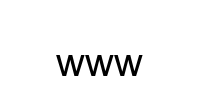

2. Noisy (Salt & Pepper):


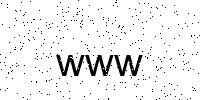

3. Blurred (Gaussian blur on noisy):


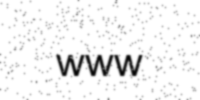

------------------------------------------------------------

 Image 2: captcha_01.png
1. Original (clean):


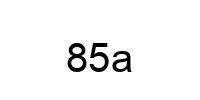

2. Noisy (Salt & Pepper):


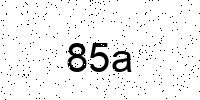

3. Blurred (Gaussian blur on noisy):


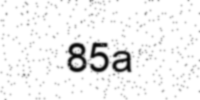

------------------------------------------------------------

 Image 3: captcha_02.png
1. Original (clean):


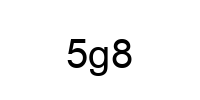

2. Noisy (Salt & Pepper):


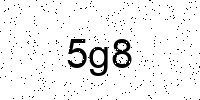

3. Blurred (Gaussian blur on noisy):


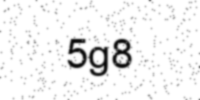

------------------------------------------------------------

 Image 4: captcha_03.png
1. Original (clean):


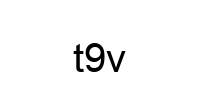

2. Noisy (Salt & Pepper):


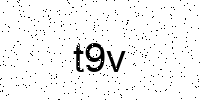

3. Blurred (Gaussian blur on noisy):


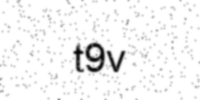

------------------------------------------------------------

 Image 5: captcha_04.png
1. Original (clean):


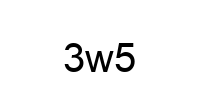

2. Noisy (Salt & Pepper):


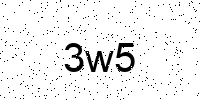

3. Blurred (Gaussian blur on noisy):


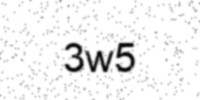

------------------------------------------------------------

 Processing pipeline complete:
   Original Captcha/ → Noisy Images/ → Blurred Images/


In [171]:
import os
from PIL import Image
from IPython.display import display

ORIGINAL_DIR = "Original Captcha"
NOISY_DIR = "Noisy Images"
BLURRED_DIR = "Blurred Images"

print(" ALL THREE VERSIONS: Original → Noisy → Blurred")
print("=" * 80)

# Check all directories exist
directories = {
    "Original": ORIGINAL_DIR,
    "Noisy": NOISY_DIR,
    "Blurred": BLURRED_DIR
}

missing_dirs = []
for name, path in directories.items():
    if not os.path.exists(path):
        missing_dirs.append(name)

if missing_dirs:
    print(f" Missing directories: {', '.join(missing_dirs)}")
    print("Please run the previous cells first.")
else:
    # Display first 5 images in all three versions
    for i in range(min(5, len(os.listdir(ORIGINAL_DIR)))):
        filename = f"captcha_{i:02d}.png"

        original_path = os.path.join(ORIGINAL_DIR, filename)
        noisy_path = os.path.join(NOISY_DIR, filename)
        blurred_path = os.path.join(BLURRED_DIR, filename)

        if all(os.path.exists(p) for p in [original_path, noisy_path, blurred_path]):
            print(f"\n Image {i+1}: {filename}")

            original_img = Image.open(original_path)
            noisy_img = Image.open(noisy_path)
            blurred_img = Image.open(blurred_path)

            # Display all three
            print("1. Original (clean):")
            display(original_img)

            print("2. Noisy (Salt & Pepper):")
            display(noisy_img)

            print("3. Blurred (Gaussian blur on noisy):")
            display(blurred_img)
            print("-" * 60)

    print(f"\n Processing pipeline complete:")
    print(f"   Original Captcha/ → Noisy Images/ → Blurred Images/")

 Displaying all 10 blurred images:

 captcha_00.png
   Description: Gaussian blur (radius=1) applied to noisy image


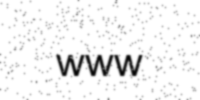

--------------------------------------------------

 captcha_01.png
   Description: Gaussian blur (radius=1) applied to noisy image


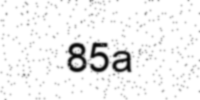

--------------------------------------------------

 captcha_02.png
   Description: Gaussian blur (radius=1) applied to noisy image


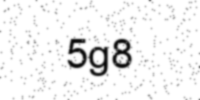

--------------------------------------------------

 captcha_03.png
   Description: Gaussian blur (radius=1) applied to noisy image


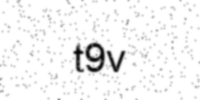

--------------------------------------------------

 captcha_04.png
   Description: Gaussian blur (radius=1) applied to noisy image


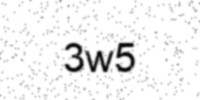

--------------------------------------------------

 captcha_05.png
   Description: Gaussian blur (radius=1) applied to noisy image


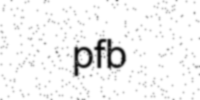

--------------------------------------------------

 captcha_06.png
   Description: Gaussian blur (radius=1) applied to noisy image


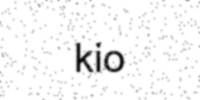

--------------------------------------------------

 captcha_07.png
   Description: Gaussian blur (radius=1) applied to noisy image


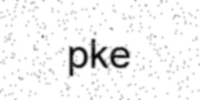

--------------------------------------------------

 captcha_08.png
   Description: Gaussian blur (radius=1) applied to noisy image


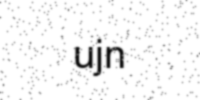

--------------------------------------------------

 captcha_09.png
   Description: Gaussian blur (radius=1) applied to noisy image


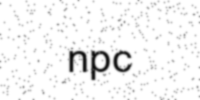

--------------------------------------------------


In [172]:
import os
from PIL import Image
from IPython.display import display

BLURRED_DIR = "Blurred Images"

if not os.path.exists(BLURRED_DIR):
    print(f"'{BLURRED_DIR}' directory not found!")
else:
    blurred_files = sorted([f for f in os.listdir(BLURRED_DIR) if f.endswith('.png')])

    if not blurred_files:
        print("No blurred images found!")
    else:
        print(f" Displaying all {len(blurred_files)} blurred images:")
        print("=" * 70)

        for img_file in blurred_files:
            img_path = os.path.join(BLURRED_DIR, img_file)
            img = Image.open(img_path)

            print(f"\n {img_file}")
            print(f"   Description: Gaussian blur (radius=1) applied to noisy image")
            display(img)
            print("-" * 50)

# == 2.1 ==

<div dir="rtl" style="text-align: right; line-height: 1.9; font-size: 16px">

### تفاوت محو‌سازی نویز و حذف واقعی نویز Salt & Pepper

زمانی که فیلترهای محو‌سازی (Blurring Filters) باعث کاهش اثر نویز Salt & Pepper می‌شوند، این فرآیند در واقع به دلیل **میانگین‌گیری از پیکسل‌های همسایگی** رخ می‌دهد. در این روش، هر پیکسل با میانگین مقادیر اطراف خود جایگزین می‌شود؛ در نتیجه پیکسل‌های حدی نویزی که مقدار آن‌ها به‌صورت غیرطبیعی برابر با ۰ (سیاه کامل) یا ۲۵۵ (سفید کامل) است، تحت تأثیر مقادیر نرمال اطراف خود قرار گرفته و به سمت مقدار میانگین محلی کشیده می‌شوند.

به‌عنوان مثال، یک پیکسل کاملاً سفید ناشی از نویز که توسط پیکسل‌های تیره‌ی متنی احاطه شده است، پس از اعمال محوشدگی به مقدار خاکستری روشن تبدیل می‌شود. به این ترتیب، لکه‌ی سفید کاملاً مشخص از بین رفته یا کم‌رنگ می‌گردد؛ با این حال، این فرآیند همزمان موجب **پخش‌شدگی کلی تصویر** و نرم شدن لبه‌ها نیز می‌شود.

---

###  حذف واقعی نویز با فیلتر Median
در مقابل، زمانی که هدف **حذف نویز به‌صورت واقعی و بدون ایجاد تاری** است، استفاده از فیلتر <span dir="ltr">Median</span> با اندازه‌ی <span dir="ltr">5x5</span> انتخاب بهینه محسوب می‌شود. این فیلتر به جای میانگین‌گیری، مقادیر پیکسل‌های موجود در همسایگی را مرتب کرده و **مقدار میانی (Median)** را به‌عنوان مقدار جدید پیکسل مرکزی انتخاب می‌کند.

این مکانیسم باعث می‌شود پیکسل‌های نویزی که مقادیر حدی دارند و به‌صورت **دورافتاده از توزیع محلی** ظاهر می‌شوند، حذف شوند؛ زیرا این مقادیر به‌عنوان داده‌های پرت (Outliers) در نظر گرفته شده و در انتخاب مقدار میانی نقشی ایفا نمی‌کنند.

نویز Salt & Pepper ماهیتی تصادفی و نقطه‌ای دارد و دقیقاً به شکل همین مقادیر حدی ظاهر می‌شود. به همین دلیل، فیلتر Median با حذف داده‌های پرت، قادر است لکه‌های نویزی را حذف کرده و در عین حال، لبه‌های تیز و ساختار متنی تصویر را حفظ کند؛ قابلیتی که در فیلتر Gaussian وجود ندارد، زیرا این فیلتر تمامی نواحی تصویر را به‌طور یکنواخت نرم می‌کند.

---

### جمع‌بندی
در نتیجه، محوشدگی (Blur) بیشتر باعث **کاهش بصری شدت نویز** می‌شود، در حالی که فیلتر Median عملیات **حذف واقعی نویز** را انجام می‌دهد. انتخاب میان این دو روش به هدف نهایی پردازش تصویر بستگی دارد:  
اگر هدف افزایش امنیت و تخریب کنترل‌شده‌ی تصویر باشد، محوشدگی مناسب‌تر است؛ اما اگر بازیابی کیفیت تصویر و حفظ جزئیات اهمیت داشته باشد، فیلتر Median گزینه‌ی ایده‌آل خواهد بود.

</div>


Found 10 CAPTCHA files with Salt & Pepper noise.
Removing noise with 5×5 Median filter kernel...

📊 Processing: captcha_09.png
BEFORE - With Salt & Pepper noise:


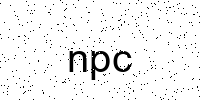

AFTER - After 5×5 Median filter:


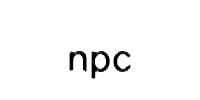

------------------------------------------------------------

📊 Processing: captcha_03.png
BEFORE - With Salt & Pepper noise:


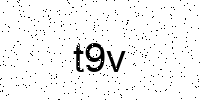

AFTER - After 5×5 Median filter:


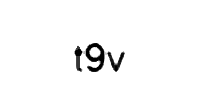

------------------------------------------------------------

📊 Processing: captcha_06.png
BEFORE - With Salt & Pepper noise:


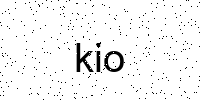

AFTER - After 5×5 Median filter:


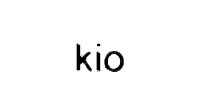

------------------------------------------------------------

C OMPLETED: 10 images noise-cleaned
Cleaned images saved in: 'Captcha_NoiseRemoved'


In [173]:
import os
from PIL import Image, ImageFilter
from IPython.display import display

OUT_DIR = "Noisy Images"  # Directory with Salt & Pepper CAPTCHAs

if not os.path.exists(OUT_DIR):
    print("CAPTCHA directory not found!")
else:
    # Get all CAPTCHA files
    image_files = [f for f in os.listdir(OUT_DIR) if f.endswith('.png')]

    if not image_files:
        print("No CAPTCHA files found!")
    else:
        print(f"Found {len(image_files)} CAPTCHA files with Salt & Pepper noise.")
        print("Removing noise with 5×5 Median filter kernel...")

        # Create directory for cleaned images
        CLEAN_DIR = "Captcha_NoiseRemoved"
        import shutil
        if os.path.exists(CLEAN_DIR):
            shutil.rmtree(CLEAN_DIR)
        os.makedirs(CLEAN_DIR, exist_ok=True)

        # Use 5×5 Median filter kernel
        KERNEL_SIZE = 5

        # Process each image
        for img_file in image_files:
            img_path = os.path.join(OUT_DIR, img_file)
            img = Image.open(img_path)

            # Apply 5×5 Median filter kernel
            cleaned_img = img.filter(ImageFilter.MedianFilter(size=KERNEL_SIZE))

            # Save cleaned image
            cleaned_img.save(os.path.join(CLEAN_DIR, f"clean_{img_file}"))

            # Display before/after for first 3 images
            if image_files.index(img_file) < 3:
                print(f"\n📊 Processing: {img_file}")
                print("BEFORE - With Salt & Pepper noise:")
                display(img)

                print("AFTER - After 5×5 Median filter:")
                display(cleaned_img)
                print("-" * 60)

        print(f"\nC OMPLETED: {len(image_files)} images noise-cleaned")
        print(f"Cleaned images saved in: '{CLEAN_DIR}'")

NOISE REMOVAL RESULTS (10 images):
clean_captcha_00.png


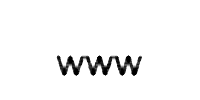

--------------------------------------------------
clean_captcha_01.png


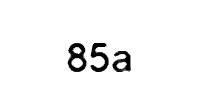

--------------------------------------------------
clean_captcha_02.png


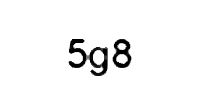

--------------------------------------------------
clean_captcha_03.png


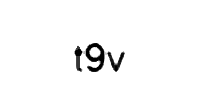

--------------------------------------------------
clean_captcha_04.png


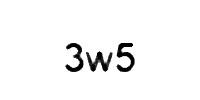

--------------------------------------------------
clean_captcha_05.png


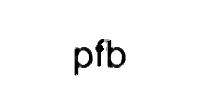

--------------------------------------------------
clean_captcha_06.png


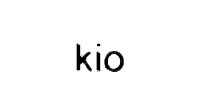

--------------------------------------------------
clean_captcha_07.png


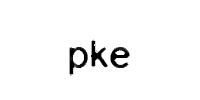

--------------------------------------------------
clean_captcha_08.png


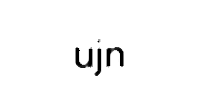

--------------------------------------------------
clean_captcha_09.png


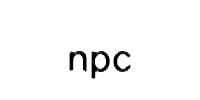

--------------------------------------------------


In [174]:
from PIL import Image
import os
from IPython.display import display

CLEAN_DIR = "Captcha_NoiseRemoved"

if not os.path.exists(CLEAN_DIR):
    print("Cleaned directory not found!")
else:
    image_files = sorted([f for f in os.listdir(CLEAN_DIR) if f.endswith('.png')])

    if not image_files:
        print("No cleaned images found!")
    else:
        print(f"NOISE REMOVAL RESULTS ({len(image_files)} images):")
        print("=" * 70)

        for img_file in image_files:
            img_path = os.path.join(CLEAN_DIR, img_file)
            img = Image.open(img_path)

            print(f"{img_file}")
            display(img)
            print("-" * 50)

# == 2.2 ==

<div dir="rtl" style="text-align: right; line-height: 1.9; font-size: 16px">

## انتخاب Unsharp Mask به‌جای روش‌های واقعی De-blurring

در این بخش، به‌جای استفاده از روش‌های واقعی رفع تاری (<span dir="ltr">True De-blurring</span>)، از تکنیک <span dir="ltr">Unsharp Mask Sharpening</span> استفاده شده است. دلیل این انتخاب، ماهیت خاص تصاویر CAPTCHA مورد نظر است که به‌طور هم‌زمان شامل **تاری Gaussian** و **نویز Salt & Pepper** می‌باشند.

روش‌های واقعی De-blurring مانند فیلتر <span dir="ltr">Wiener</span> تلاش می‌کنند تاری تصویر را از طریق **وارونه‌سازی ریاضی کرنل تاری در حوزه فرکانس** جبران کنند. این فرآیند معمولاً شامل تقسیم بر تابع انتقال سیستم (Blur Kernel) است. با این حال، چنین عملیاتی در حضور نویز بسیار ناپایدار بوده و موجب **تقویت انفجاری نویز** می‌شود؛ به‌ویژه نویز Salt & Pepper که مقادیر حدی دارد، پس از این وارونه‌سازی به‌صورت لکه‌های شدید و آرتیفکت‌های بصری بسیار مخرب ظاهر می‌شود.

---

###  مزیت Unsharp Mask در حضور نویز
در مقابل، تکنیک <span dir="ltr">Unsharp Mask</span> یک روش **افزایش وضوح ادراکی (Perceptual Sharpening)** محسوب می‌شود و به‌هیچ‌وجه اقدام به وارونه‌سازی ریاضی تاری نمی‌کند. این روش با محاسبه اختلاف بین تصویر اصلی و نسخه‌ی محوشده‌ی آن، مؤلفه‌های لبه‌ای (High-frequency Components) را استخراج کرده و سپس آن‌ها را با ضریب مشخصی به تصویر اولیه بازمی‌افزاید.

به‌کمک پارامتر <span dir="ltr">Threshold</span>، این روش قادر است از تقویت نویزهای کم‌کنتراست جلوگیری کرده و تنها لبه‌های قوی، مانند مرز حروف متنی، را برجسته نماید. در نتیجه، لبه‌های متن واضح‌تر شده، بدون آن‌که نویز موجود به‌شکل اغراق‌آمیز تقویت شود.

---

### تفاوت دو رویکرد
تفاوت اصلی میان این دو رویکرد ماهیتی **فلسفی و مفهومی** دارد:

- روش‌های واقعی De-blurring به دنبال **بازسازی کامل و دقیق اطلاعات از دست‌رفته** به‌صورت ریاضی هستند؛ هدفی که در حضور نویز عملاً غیرممکن است.
- در مقابل، Unsharp Mask تلاش می‌کند **آنچه باقی مانده است را از نظر ادراکی تقویت کند** تا تصویر برای انسان خواناتر شود.

در تصاویر واقعی و نویزی، تلاش برای بازسازی کامل معمولاً منجر به ایجاد آرتیفکت‌هایی مانند <span dir="ltr">Ringing</span> و تقویت شدید نویز می‌شود، در حالی که افزایش وضوح ادراکی نتیجه‌ای پایدارتر و قابل کنترل‌تر ارائه می‌دهد.

---

###  جمع‌بندی نهایی
برای تصاویر CAPTCHA مورد بررسی که دارای تاری Gaussian خفیف و نویز Salt & Pepper هستند، استفاده از <span dir="ltr">Unsharp Mask</span> بهترین تعادل را بین **بهبود خوانایی برای کاربر انسانی** و **جلوگیری از تشدید نویز** فراهم می‌کند. این روش در مقایسه با تکنیک‌های تهاجمی De-blurring، راهکاری ایمن، مؤثر و واقع‌گرایانه است که از بدتر شدن کیفیت تصویر جلوگیری می‌کند و در عین حال وضوح متنی را افزایش می‌دهد.

</div>


Found 10 blurred CAPTCHA files.
Applying Unsharp Mask for de-blurring...

 Processing: captcha_09.png
BEFORE - Blurred CAPTCHA (Gaussian radius=1):


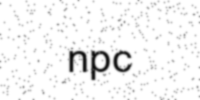

AFTER - Unsharp Mask de-blurring:


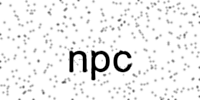

------------------------------------------------------------

 Processing: captcha_03.png
BEFORE - Blurred CAPTCHA (Gaussian radius=1):


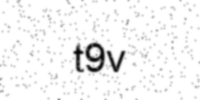

AFTER - Unsharp Mask de-blurring:


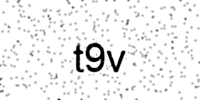

------------------------------------------------------------

 Processing: captcha_06.png
BEFORE - Blurred CAPTCHA (Gaussian radius=1):


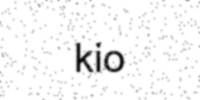

AFTER - Unsharp Mask de-blurring:


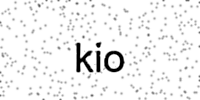

------------------------------------------------------------

 COMPLETED: 10 images de-blurred
 De-blurred images saved in: 'Captcha_Deblurred'


In [175]:
import os
from PIL import ImageFilter, Image
from IPython.display import display
import numpy as np

BLURRED_DIR = "Blurred Images"

if not os.path.exists(BLURRED_DIR):
    print("Blurred CAPTCHA directory not found!")
else:

    image_files = [f for f in os.listdir(BLURRED_DIR) if f.endswith('.png')]

    if not image_files:
        print("No blurred CAPTCHA files found!")
    else:
        print(f"Found {len(image_files)} blurred CAPTCHA files.")
        print("Applying Unsharp Mask for de-blurring...")

        DEBLURRED_DIR = "Captcha_Deblurred"
        import shutil
        if os.path.exists(DEBLURRED_DIR):
            shutil.rmtree(DEBLURRED_DIR)
        os.makedirs(DEBLURRED_DIR, exist_ok=True)

        def apply_unsharp_mask(image, radius=2, percent=150, threshold=3):
            """
            Apply Unsharp Mask filter to de-blur image

            Parameters:
            - radius: Controls edge detection width (2 for mild blur)
            - percent: Strength of sharpening (150% = moderate)
            - threshold: Minimum contrast to apply sharpening

            Formula: original + (original - blurred) × percent/100
            """
            return image.filter(ImageFilter.UnsharpMask(
                radius=radius,
                percent=percent,
                threshold=threshold
            ))

        def custom_unsharp_mask(image, sigma=1.0, strength=1.5):
            """
            Custom implementation of Unsharp Mask for better control
            """
            blurred = image.filter(ImageFilter.GaussianBlur(radius=sigma))

            img_array = np.array(image, dtype=np.float32)
            blurred_array = np.array(blurred, dtype=np.float32)

            mask = img_array - blurred_array
            sharpened_array = img_array + strength * mask

            sharpened_array = np.clip(sharpened_array, 0, 255)

            return Image.fromarray(sharpened_array.astype('uint8'))

        for img_file in image_files:
            img_path = os.path.join(BLURRED_DIR, img_file)
            blurred_img = Image.open(img_path)

            deblurred_img = apply_unsharp_mask(blurred_img, radius=2, percent=150, threshold=3)

            deblurred_img.save(os.path.join(DEBLURRED_DIR, f"deblurred_{img_file}"))

            if image_files.index(img_file) < 3:
                print(f"\n Processing: {img_file}")
                print("BEFORE - Blurred CAPTCHA (Gaussian radius=1):")
                display(blurred_img)

                print("AFTER - Unsharp Mask de-blurring:")
                display(deblurred_img)
                print("-" * 60)

        print(f"\n COMPLETED: {len(image_files)} images de-blurred")
        print(f" De-blurred images saved in: '{DEBLURRED_DIR}'")

 Found 10 Unsharp Masked images in 'Captcha_Deblurred':

 Image 1/10: deblurred_captcha_00.png
   Size: (200, 100), Mode: RGB


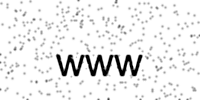

------------------------------------------------------------

 Image 2/10: deblurred_captcha_01.png
   Size: (200, 100), Mode: RGB


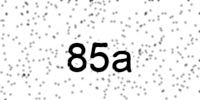

------------------------------------------------------------

 Image 3/10: deblurred_captcha_02.png
   Size: (200, 100), Mode: RGB


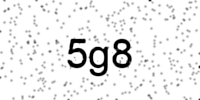

------------------------------------------------------------

 Image 4/10: deblurred_captcha_03.png
   Size: (200, 100), Mode: RGB


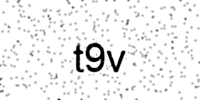

------------------------------------------------------------

 Image 5/10: deblurred_captcha_04.png
   Size: (200, 100), Mode: RGB


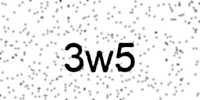

------------------------------------------------------------

 Image 6/10: deblurred_captcha_05.png
   Size: (200, 100), Mode: RGB


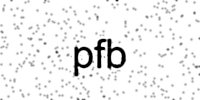

------------------------------------------------------------

 Image 7/10: deblurred_captcha_06.png
   Size: (200, 100), Mode: RGB


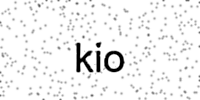

------------------------------------------------------------

 Image 8/10: deblurred_captcha_07.png
   Size: (200, 100), Mode: RGB


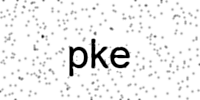

------------------------------------------------------------

 Image 9/10: deblurred_captcha_08.png
   Size: (200, 100), Mode: RGB


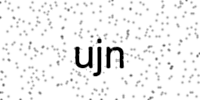

------------------------------------------------------------

 Image 10/10: deblurred_captcha_09.png
   Size: (200, 100), Mode: RGB


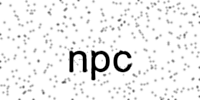

------------------------------------------------------------

 Displayed all 10 Unsharp Masked images


In [176]:
from PIL import Image
import os
from IPython.display import display

DEBLURRED_DIR = "Captcha_Deblurred"

# Check if directory exists
if not os.path.exists(DEBLURRED_DIR):
    print(f"Directory '{DEBLURRED_DIR}' not found!")
    print("Please run the Unsharp Mask code first to generate the images.")
else:
    # Get all Unsharp Masked images
    image_files = sorted([f for f in os.listdir(DEBLURRED_DIR) if f.endswith('.png')])

    if not image_files:
        print(f"No images found in '{DEBLURRED_DIR}'!")
    else:
        print(f" Found {len(image_files)} Unsharp Masked images in '{DEBLURRED_DIR}':")
        print("=" * 80)

        # Display all images
        for idx, img_file in enumerate(image_files, 1):
            img_path = os.path.join(DEBLURRED_DIR, img_file)
            img = Image.open(img_path)

            print(f"\n Image {idx}/{len(image_files)}: {img_file}")
            print(f"   Size: {img.size}, Mode: {img.mode}")
            display(img)
            print("-" * 60)

        print(f"\n Displayed all {len(image_files)} Unsharp Masked images")

# == 2.3 ==

<div dir="rtl" style="text-align: right; line-height: 1.9; font-size: 16px">

### حذف نویز با تحلیل مؤلفه‌های هم‌بند (Connected Components)
برای حذف نویز Salt & Pepper بدون ایجاد تاری، از روش تحلیل مؤلفه‌های هم‌بند استفاده شده است. در این مرحله، تصاویر ابتدا با استفاده از یک آستانه‌ی ثابت برابر با <span dir="ltr">128</span> (نقطه میانی بازه شدت ۰ تا ۲۵۵) به تصویر دودویی تبدیل شدند.

پس از دودویی‌سازی، تمامی مؤلفه‌های هم‌بند شناسایی شده و مؤلفه‌هایی که مساحت آن‌ها کمتر از **۲۵ پیکسل** بود حذف گردیدند. این رویکرد به‌طور مؤثر نقاط نویزی ایزوله را حذف می‌کند، در حالی که ساختار پیوسته‌ی حروف و ضخامت خطوط متنی حفظ می‌شود.
</div>


REMOVING NOISE COMPONENTS WHILE KEEPING ORIGINAL STYLE:
1. Convert to binary
2. Remove small components (< 25 pixels)
3. Keep WHITE background with BLACK text (original style)

 PROCESSING: captcha_09.png
   Binary threshold: 128
   Area threshold: 25 pixels
   Components found: 370

1. ORIGINAL (Noisy Image):


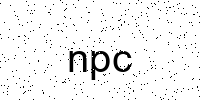


2. INTERMEDIATE (Binary for analysis):


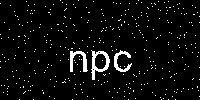


3. FINAL (Cleaned - White BG, Black Text):


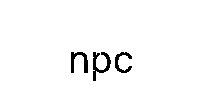

------------------------------------------------------------

 PROCESSING: captcha_03.png
   Binary threshold: 128
   Area threshold: 25 pixels
   Components found: 366

1. ORIGINAL (Noisy Image):


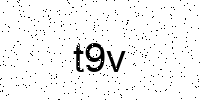


2. INTERMEDIATE (Binary for analysis):


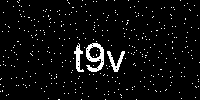


3. FINAL (Cleaned - White BG, Black Text):


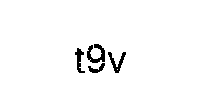

------------------------------------------------------------

 PROCESSING: captcha_06.png
   Binary threshold: 128
   Area threshold: 25 pixels
   Components found: 326

1. ORIGINAL (Noisy Image):


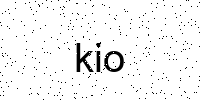


2. INTERMEDIATE (Binary for analysis):


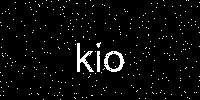


3. FINAL (Cleaned - White BG, Black Text):


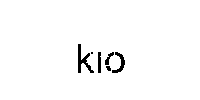

------------------------------------------------------------

 PROCESSING COMPLETE:
Input: 'Noisy Images' → 10 noisy images
Output: 'Cleaned_OriginalStyle' → 10 cleaned images
THRESHOLDS:
   • Binary: 128
   • Area: 25 pixels (removes components smaller)


In [177]:
import os
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

INPUT_DIR = "Noisy Images"
CLEANED_DIR = "Cleaned_OriginalStyle"

if not os.path.exists(INPUT_DIR):
    print(f"Directory '{INPUT_DIR}' not found!")
else:
    # Get all image files
    image_files = [f for f in os.listdir(INPUT_DIR) if f.endswith('.png')]

    if not image_files:
        print("No images found!")
    else:
        print("REMOVING NOISE COMPONENTS WHILE KEEPING ORIGINAL STYLE:")
        print("1. Convert to binary")
        print("2. Remove small components (< 25 pixels)")
        print("3. Keep WHITE background with BLACK text (original style)")
        print("=" * 70)

        import shutil
        if os.path.exists(CLEANED_DIR):
            shutil.rmtree(CLEANED_DIR)
        os.makedirs(CLEANED_DIR, exist_ok=True)

        # MY CHOSEN THRESHOLDS:
        BINARY_THRESHOLD = 128
        AREA_THRESHOLD = 25

        def remove_noise_keep_style(image_path, bin_thresh=128, area_thresh=25):
            """
            Remove noise components while keeping original white background
            """
            img = cv2.imread(image_path)

            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            _, binary = cv2.threshold(gray, bin_thresh, 255, cv2.THRESH_BINARY_INV)

            num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
                binary, connectivity=8
            )

            mask = np.zeros_like(binary)
            for i in range(1, num_labels):
                if stats[i, cv2.CC_STAT_AREA] >= area_thresh:
                    mask[labels == i] = 255

            result = cv2.bitwise_not(mask)

            # Step 5: Optional - clean up with morphological operations
            kernel = np.ones((2, 2), np.uint8)
            result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)

            return result, binary, num_labels-1

        # Process all images
        for img_file in image_files:
            img_path = os.path.join(INPUT_DIR, img_file)

            # Remove noise while keeping original style
            cleaned, binary, total_components = remove_noise_keep_style(
                img_path,
                bin_thresh=BINARY_THRESHOLD,
                area_thresh=AREA_THRESHOLD
            )

            # Convert to RGB for saving
            cleaned_rgb = cv2.cvtColor(cleaned, cv2.COLOR_GRAY2RGB)

            # Save cleaned image (with original style)
            Image.fromarray(cleaned_rgb).save(
                os.path.join(CLEANED_DIR, f"cleaned_{img_file}")
            )

            # Show detailed results for first 3 images
            if image_files.index(img_file) < 3:
                print(f"\n PROCESSING: {img_file}")
                print(f"   Binary threshold: {BINARY_THRESHOLD}")
                print(f"   Area threshold: {AREA_THRESHOLD} pixels")
                print(f"   Components found: {total_components}")

                # Display steps
                original = Image.open(img_path)
                print("\n1. ORIGINAL (Noisy Image):")
                display(original)

                print("\n2. INTERMEDIATE (Binary for analysis):")
                display(Image.fromarray(binary))

                print("\n3. FINAL (Cleaned - White BG, Black Text):")
                display(Image.fromarray(cleaned_rgb))
                print("-" * 60)

        print(f"\n PROCESSING COMPLETE:")
        print(f"Input: '{INPUT_DIR}' → {len(image_files)} noisy images")
        print(f"Output: '{CLEANED_DIR}' → {len(image_files)} cleaned images")
        print(f"THRESHOLDS:")
        print(f"   • Binary: {BINARY_THRESHOLD}")
        print(f"   • Area: {AREA_THRESHOLD} pixels (removes components smaller)")
        print("=" * 70)

CLEANED IMAGES WITH ORIGINAL STYLE (10 images):
Style: White background with black text
Noise removal: Components < 25 pixels removed
----------------------------------------------------------------------

cleaned_captcha_00.png


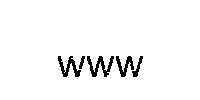

--------------------------------------------------

cleaned_captcha_01.png


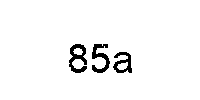

--------------------------------------------------

cleaned_captcha_02.png


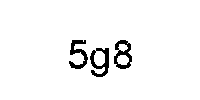

--------------------------------------------------

cleaned_captcha_03.png


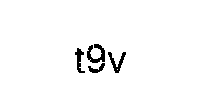

--------------------------------------------------

cleaned_captcha_04.png


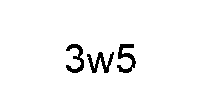

--------------------------------------------------

cleaned_captcha_05.png


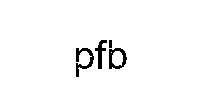

--------------------------------------------------

cleaned_captcha_06.png


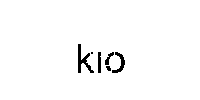

--------------------------------------------------

cleaned_captcha_07.png


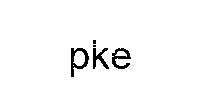

--------------------------------------------------

cleaned_captcha_08.png


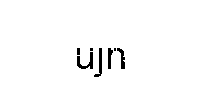

--------------------------------------------------

cleaned_captcha_09.png


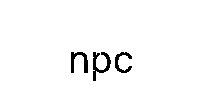

--------------------------------------------------


In [178]:
from PIL import Image
import os
from IPython.display import display

CLEANED_DIR = "Cleaned_OriginalStyle"

if not os.path.exists(CLEANED_DIR):
    print("Cleaned directory not found!")
else:
    image_files = sorted([f for f in os.listdir(CLEANED_DIR) if f.endswith('.png')])

    if not image_files:
        print("No cleaned images found!")
    else:
        print(f"CLEANED IMAGES WITH ORIGINAL STYLE ({len(image_files)} images):")
        print("=" * 70)
        print("Style: White background with black text")
        print(f"Noise removal: Components < 25 pixels removed")
        print("-" * 70)

        for img_file in image_files:
            img_path = os.path.join(CLEANED_DIR, img_file)
            img = Image.open(img_path)

            print(f"\n{img_file}")
            display(img)
            print("-" * 50)

# == 3.1 ==

<div dir="rtl">


##Segmentation via Connected Components
در مرحله‌ی سگمنتیشن، هدف ما جداسازی کاراکترهای موجود در تصویر کپچا است.
چون تصاویر خروجی مرحله‌ی قبل باینری و صاف‌شده‌اند، روش Connected Components Analysis بهترین انتخاب است.

در این روش:

* هر ناحیه‌ی سفید (foreground) که به‌صورت 8-Connected به هم وصل باشد، یک component محسوب می‌شود.

* هر component احتمالاً یک کاراکتر است.

* با حذف componentهای کوچک (نویز)، تنها کاراکترها باقی می‌مانند.

* سپس مختصات bounding box هر کاراکتر استخراج و تصویر برش داده می‌شود.

این روش برای کپچاهای ساده و باینری بسیار کارآمد است و دقت مناسبی برای مراحل OCR غیر یادگیری‌محور فراهم می‌کند.
</div>


In [179]:
import cv2
import numpy as np
from pathlib import Path

def extract_characters_from_binary(binary_img, min_area=40):

    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
        binary_img, connectivity=8
    )

    boxes = []
    for i in range(1, num_labels):  # 0 background
        x, y, w, h, area = stats[i]
        if area < min_area:
            continue   # remove little noises

        boxes.append((x, y, w, h))

    # sort left to right
    boxes.sort(key=lambda b: b[0])
    return boxes


In [180]:
INPUT_DIR = Path("Cleaned_OriginalStyle")
OUTPUT_DIR = Path("Segmented Characters")
OUTPUT_DIR.mkdir(exist_ok=True)

summary = []  # to report the number of characters of each image

for img_path in sorted(INPUT_DIR.glob("*.png")):
    # reading images without any change(could be 4-channel image)
    img = cv2.imread(str(img_path), cv2.IMREAD_UNCHANGED)

    # convert to gray
    if img.ndim == 3 and img.shape[2] == 4:
        gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
    elif img.ndim == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy()

    # reversed binary
    _, binary = cv2.threshold(
        gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )

    # arbitrary morphology
    kernel = np.ones((2, 2), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)

    # extract character boxes
    boxes = extract_characters_from_binary(binary, min_area=40)

    # save each character separately
    for idx, (x, y, w, h) in enumerate(boxes, start=1):
        char_img = binary[y:y+h, x:x+w]
        out_name = f"{img_path.stem}_char{idx}.png"
        cv2.imwrite(str(OUTPUT_DIR / out_name), char_img)

    summary.append((img_path.name, len(boxes)))

# final report
for name, count in summary:
    print(f"{name}: {count} characters found")


cleaned_captcha_00.png: 5 characters found
cleaned_captcha_01.png: 3 characters found
cleaned_captcha_02.png: 3 characters found
cleaned_captcha_03.png: 4 characters found
cleaned_captcha_04.png: 3 characters found
cleaned_captcha_05.png: 3 characters found
cleaned_captcha_06.png: 4 characters found
cleaned_captcha_07.png: 3 characters found
cleaned_captcha_08.png: 4 characters found
cleaned_captcha_09.png: 3 characters found


<div>

##==3.2==

##Resizing

</div>

In [181]:
import cv2
import numpy as np
from pathlib import Path

INPUT_DIR = Path("Segmented Characters")
OUTPUT_DIR = Path("Resized Characters 64x64")
OUTPUT_DIR.mkdir(exist_ok=True)

TARGET_SIZE = 64
INNER_MARGIN = 8  # اگر می‌خوای کاراکتر بزرگ‌تر باشه می‌تونی اینو کمتر کنی

for img_path in sorted(INPUT_DIR.glob("*.png")):
    # تصویر سگمنت‌شده که از قبل: کاراکتر سفید، زمینه مشکی
    char_img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)

    # (اختیاری) فقط مطمئن می‌شیم باینریه؛ دیگه INVERT نمی‌کنیم
    _, char_bin = cv2.threshold(
        char_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )
    # توجه: اینجا دیگه هیچ bitwise_not نداریم ❌

    h, w = char_bin.shape

    max_char_size = TARGET_SIZE - 2 * INNER_MARGIN
    scale = min(max_char_size / w, max_char_size / h)

    new_w = max(1, int(w * scale))
    new_h = max(1, int(h * scale))

    # بزرگ‌کردن بدون آنتی‌الیاس برای اینکه باینری بمونه
    resized_char = cv2.resize(char_bin, (new_w, new_h),
                              interpolation=cv2.INTER_NEAREST)

    # بوم 64×64 مشکی
    canvas = np.zeros((TARGET_SIZE, TARGET_SIZE), dtype=np.uint8)

    x_offset = (TARGET_SIZE - new_w) // 2
    y_offset = (TARGET_SIZE - new_h) // 2

    canvas[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = resized_char

    out_path = OUTPUT_DIR / img_path.name
    cv2.imwrite(str(out_path), canvas)

print("Each character was converted 64*64.")


Each character was converted 64*64.


<div>

##==4.5==

## Character Recognition

</div>

In [182]:
from zipfile import ZipFile
from pathlib import Path

zip_path = Path("Mapset.zip")
extract_dir = Path("Mapset")

extract_dir.mkdir(exist_ok=True)

with ZipFile(zip_path, 'r') as zf:
    zf.extractall(extract_dir)

print("Extracted to:", extract_dir.resolve())


Extracted to: /content/Mapset


In [183]:
import cv2
import numpy as np
from pathlib import Path

MAPSET_DIR = Path("Mapset/Mapset")

def load_mapset_templates(mapset_dir=MAPSET_DIR):
    """
    خروجی: لیستی از دیکشنری‌ها:
    [
      {"label": "4", "img": np.array(64x64)},
      {"label": "w", "img": ...},
      ...
    ]
    """
    templates = []

    for img_path in sorted(mapset_dir.glob("*.png")):
        img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)

        # باینری کردن
        _, bin_img = cv2.threshold(
            img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
        )

        # اگر foreground کمتر از background بود، برعکسش می‌کنیم
        if np.sum(bin_img == 255) < np.sum(bin_img == 0):
            bin_img = cv2.bitwise_not(bin_img)

        # فرض: برچسب کاراکتر از اسم فایل استخراج می‌شود
        # مثلا: "a_01.png" -> label = "a"
        # یا "4.png" -> label = "4"
        stem = img_path.stem
        label = stem[0]   # بسته به نام‌گذاری Mapset اگر فرق می‌کند این را اصلاح کن

        templates.append({
            "label": label,
            "img": bin_img
        })

    return templates

templates = load_mapset_templates()
print(f"Loaded {len(templates)} templates from Mapset.")


Loaded 36 templates from Mapset.


In [184]:
def normalized_correlation(a, b):

    a = a.astype(np.float32).ravel()
    b = b.astype(np.float32).ravel()

    a_mean = a.mean()
    b_mean = b.mean()

    a -= a_mean
    b -= b_mean

    denom = (np.linalg.norm(a) * np.linalg.norm(b) + 1e-8)
    if denom == 0:
        return 0.0

    return float(np.dot(a, b) / denom)


In [185]:
def recognize_character(char_img, templates):

    best_label = None
    best_score = -1.0

    for t in templates:
        score = normalized_correlation(char_img, t["img"])
        if score > best_score:
            best_score = score
            best_label = t["label"]

    return best_label, best_score


In [186]:
INPUT_DIR = Path("Resized Characters 64x64")

In [187]:
import pandas as pd

RESULTS = {}

for img_path in sorted(INPUT_DIR.glob("*.png")):

    stem = img_path.stem

    if "_char" not in stem:
        continue

    base_name, char_part = stem.rsplit("_char", 1)
    try:
        char_index = int(char_part)
    except ValueError:
        continue

    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
    _, bin_img = cv2.threshold(img, 0, 255,
                               cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    if np.sum(bin_img == 255) < np.sum(bin_img == 0):
        bin_img = cv2.bitwise_not(bin_img)

    pred_label, pred_score = recognize_character(bin_img, templates)

    if base_name not in RESULTS:
        RESULTS[base_name] = {
            "chars": {},
            "scores": {}
        }

    RESULTS[base_name]["chars"][char_index] = pred_label
    RESULTS[base_name]["scores"][char_index] = pred_score

# creating csv
rows = []

for base_name, data in sorted(RESULTS.items()):
    indices = sorted(data["chars"].keys())

    predicted_text = "".join(data["chars"][i] for i in indices)

    # average of similarity
    avg_score = float(np.mean([data["scores"][i] for i in indices]))

    row = {
        "image_name": base_name + ".png",
        "predicted_text": predicted_text,
        "avg_similarity": avg_score,
    }

    for i in indices:
        row[f"char{i}_pred"] = data["chars"][i]
        row[f"char{i}_score"] = data["scores"][i]

    rows.append(row)

df = pd.DataFrame(rows)
df.to_csv("recognition_results.csv", index=False)
print("CSV file 'recognition_results.csv' created.")


CSV file 'recognition_results.csv' created.
